In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# Any results you write to the current directory are saved as output.

/kaggle/input/plant-pathology-2020-fgvc7/test.csv
/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv
/kaggle/input/plant-pathology-2020-fgvc7/train.csv
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_42.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_733.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_887.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1771.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1059.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1263.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_537.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_654.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1469.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_702.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_159.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_875.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_697.jpg
/kaggle/input/plant-pathology-20

/kaggle/input/plant-pathology-2020-fgvc7/images/Train_672.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1664.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1690.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_550.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_282.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1030.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1480.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1203.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_857.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_307.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1442.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_285.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1358.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1756.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1144.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_86.jpg
/kaggle

In [2]:
import cv2
import math
import numpy as np
import scipy as sp
import pandas as pd

import tensorflow as tf
from keras.layers import LeakyReLU



Using TensorFlow backend.


In [3]:

IMAGE_PATH = "../input/plant-pathology-2020-fgvc7/images/"
TEST_PATH = "../input/plant-pathology-2020-fgvc7/test.csv"
TRAIN_PATH = "../input/plant-pathology-2020-fgvc7/train.csv"
SUB_PATH = "../input/plant-pathology-2020-fgvc7/sample_submission.csv"

sub = pd.read_csv(SUB_PATH)
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)

In [4]:
train_data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
test_data.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [6]:
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

train_image=[]
SAMPLE_LEN = 100
img_size= 80

def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(IMAGE_PATH + file_path)
    image=cv2.resize(image,(img_size,img_size),interpolation=cv2.INTER_AREA)
    train_image.append(image)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

train_img = train_data["image_id"].progress_apply(load_image)

In [7]:
import plotly.express as px
fig = px.imshow(train_image[5])
fig.show()

In [8]:
test_image=[]
SAMPLE_LEN = 100
img_size= 80

def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(IMAGE_PATH + file_path)
    image=cv2.resize(image,(img_size,img_size),interpolation=cv2.INTER_AREA)
    test_image.append(image)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

test_img = train_data["image_id"].progress_apply(load_image)

In [9]:
fig = px.imshow(train_image[3])
fig.show()

In [10]:
X_Train = np.ndarray(shape=(len(train_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in train_image:
    #X_Train[i]=img_to_array(image)
    X_Train[i]=train_image[i]
    i=i+1
X_Train=X_Train/255
print('Train Shape: {}'.format(X_Train.shape))

Train Shape: (1821, 80, 80, 3)


In [11]:
X_Test = np.ndarray(shape=(len(test_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in test_image:
    #X_Test[i]=img_to_array(image)
    X_Test[i]=test_image[i]
    i=i+1
    
X_Test=X_Test/255
print('Test Shape: {}'.format(X_Test.shape))

Test Shape: (1821, 80, 80, 3)


In [12]:
y = train_data.drop(['image_id'],axis=1)
y.head()

,healthy,multiple_diseases,rust,scab
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [13]:
y_train = np.array(y.values)
y_train.shape

(1821, 4)

In [47]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,LeakyReLU
from keras.optimizers import SGD
from keras.optimizers import Adam

In [72]:
lr = LeakyReLU(alpha=0.05)
lr.__name__ = 'relu'

In [87]:
def const():
        model = Sequential()
        
        
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', input_shape=(img_size, img_size, 3),
                activation='relu'))
        model.add(BatchNormalization()) # Normalize the activations of the previous layer at each batch
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME',kernel_initializer='he_normal'))
        model.add(lr)
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    
        model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME',kernel_initializer='he_normal'))
        model.add(lr)
        model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME'))
        model.add(lr)
        model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
   
        model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME',kernel_initializer='he_normal'))
        model.add(lr)
        model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME'))
        model.add(lr)
        model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Flatten()) # Flatten the input
        model.add(Dense(64))
        model.add(lr)
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu',kernel_initializer='he_normal'))
        model.add(Dense(4, activation='softmax'))
    # Configure the learning process
    # The loss function is the objective that the model will try to minimize
    # For any classification problem, use accuracy metric
        optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
        model.summary()
    
    
        return model


        


In [88]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau,ModelCheckpoint

In [89]:
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, y_train, 
                                                  test_size=0.3, random_state=42)

In [90]:
model = const()
image_gen = ImageDataGenerator(rotation_range=360,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip = True,
                              vertical_flip = True)
image_gen.fit(X_train)

reduce = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,
                          patience=8,verbose=1,min_lr=1e-3)

checkp = ModelCheckpoint('model.h5',verbose=1,save_best_only=True)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 80, 80, 32)        896       
_________________________________________________________________
batch_normalization_56 (Batc (None, 80, 80, 32)        128       
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 80, 80, 32)        9248      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    multiple                  0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 80, 80, 32)        9248      
_________________________________________________________________
batch_normalization_57 (Batc (None, 80, 80, 32)        128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 40, 40, 32)      

In [91]:
es = EarlyStopping(monitor='val_loss',patience=15)

In [92]:
model.fit_generator(image_gen.flow(X_train, Y_train, batch_size=32),
            steps_per_epoch=X_train.shape[0] // 32,
            epochs=140,
            verbose=1,
            callbacks=[reduce,checkp],
            validation_data=(X_val, Y_val))

Epoch 1/140
39/39 [==============================] - 73s 2s/step - loss: 1.4579 - accuracy: 0.3213 - val_loss: 1.3400 - val_accuracy: 0.3382

Epoch 00001: val_loss improved from inf to 1.33997, saving model to model.h5
Epoch 2/140
39/39 [==============================] - 71s 2s/step - loss: 1.3003 - accuracy: 0.3734 - val_loss: 1.3734 - val_accuracy: 0.3382

Epoch 00002: val_loss did not improve from 1.33997
Epoch 3/140
39/39 [==============================] - 70s 2s/step - loss: 1.2822 - accuracy: 0.3714 - val_loss: 1.4664 - val_accuracy: 0.3382

Epoch 00003: val_loss did not improve from 1.33997
Epoch 4/140
39/39 [==============================] - 70s 2s/step - loss: 1.2557 - accuracy: 0.3655 - val_loss: 1.7048 - val_accuracy: 0.3382

Epoch 00004: val_loss did not improve from 1.33997
Epoch 5/140
39/39 [==============================] - 71s 2s/step - loss: 1.2396 - accuracy: 0.3905 - val_loss: 1.6780 - val_accuracy: 0.3382

Epoch 00005: val_loss did not improve from 1.33997
Epoch 6/1

39/39 [==============================] - 71s 2s/step - loss: 0.4053 - accuracy: 0.8720 - val_loss: 0.7124 - val_accuracy: 0.8062

Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.

Epoch 00042: val_loss did not improve from 0.50304
Epoch 43/140
39/39 [==============================] - 71s 2s/step - loss: 0.3461 - accuracy: 0.8961 - val_loss: 0.3612 - val_accuracy: 0.8739

Epoch 00043: val_loss improved from 0.50304 to 0.36124, saving model to model.h5
Epoch 44/140
39/39 [==============================] - 71s 2s/step - loss: 0.3766 - accuracy: 0.8838 - val_loss: 0.3675 - val_accuracy: 0.8830

Epoch 00044: val_loss did not improve from 0.36124
Epoch 45/140
39/39 [==============================] - 70s 2s/step - loss: 0.3371 - accuracy: 0.8948 - val_loss: 0.6177 - val_accuracy: 0.7788

Epoch 00045: val_loss did not improve from 0.36124
Epoch 46/140
39/39 [==============================] - 70s 2s/step - loss: 0.3601 - accuracy: 0.8886 - val_loss: 0.5172 - val_a


Epoch 00082: val_loss did not improve from 0.32995
Epoch 83/140
39/39 [==============================] - 70s 2s/step - loss: 0.2761 - accuracy: 0.9106 - val_loss: 0.3845 - val_accuracy: 0.8757

Epoch 00083: val_loss did not improve from 0.32995
Epoch 84/140
39/39 [==============================] - 70s 2s/step - loss: 0.2751 - accuracy: 0.9106 - val_loss: 0.5083 - val_accuracy: 0.8446

Epoch 00084: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00084: val_loss did not improve from 0.32995
Epoch 85/140
39/39 [==============================] - 70s 2s/step - loss: 0.2680 - accuracy: 0.9171 - val_loss: 0.3850 - val_accuracy: 0.8848

Epoch 00085: val_loss did not improve from 0.32995
Epoch 86/140
39/39 [==============================] - 70s 2s/step - loss: 0.2457 - accuracy: 0.9203 - val_loss: 0.9571 - val_accuracy: 0.7532

Epoch 00086: val_loss did not improve from 0.32995
Epoch 87/140
39/39 [==============================] - 70s 2s/step - loss: 0.2647 - accuracy: 0.9098 - val_l

In [93]:
loss = pd.DataFrame(model.history.history)
loss

,val_loss,val_accuracy,loss,accuracy,lr
0,1.339967,0.338208,1.458663,0.321256,0.002
1,1.373429,0.338208,1.300301,0.373397,0.002
2,1.466380,0.338208,1.281983,0.371359,0.002
3,1.704822,0.338208,1.254462,0.365539,0.002
4,1.677995,0.338208,1.239258,0.390499,0.002
...,...,...,...,...,...
135,0.564115,0.864717,0.205275,0.934783,0.001
136,0.508372,0.862888,0.228625,0.926375,0.001
137,0.390182,0.892139,0.218588,0.923077,0.001
138,0.495047,0.844607,0.252876,0.924316,0.001


In [94]:
pred = model.predict(X_val)
pred

array([[2.2540377e-07, 2.9755047e-02, 9.7024465e-01, 7.9234709e-08],
       [9.9941087e-01, 2.2989571e-04, 4.9919643e-05, 3.0930244e-04],
       [9.7941476e-01, 4.1946070e-04, 2.0088078e-02, 7.7679462e-05],
       ...,
       [1.4577695e-08, 1.1566796e-03, 9.9884331e-01, 2.5961875e-09],
       [7.2011579e-05, 3.0375354e-03, 1.2755814e-07, 9.9689037e-01],
       [9.9952877e-01, 3.0743727e-04, 5.4938670e-07, 1.6324164e-04]],
      dtype=float32)

In [95]:
accuracy = model.evaluate(X_val, Y_val, verbose=1)
print('Test_Accuracy:-', accuracy[1]*100)

547/547 [==============================] - 7s 12ms/step
Test_Accuracy:- 91.04204773902893


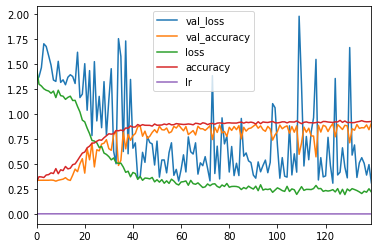

In [96]:
loss.plot()

In [98]:
predi = pred>0.7
predi

array([[False, False,  True, False],
       [ True, False, False, False],
       [ True, False, False, False],
       ...,
       [False, False,  True, False],
       [False, False, False,  True],
       [ True, False, False, False]])

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(classification_report(Y_val,predi))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       148
           1       0.00      0.00      0.00        29
           2       0.94      0.97      0.95       185
           3       0.97      0.78      0.87       185

   micro avg       0.94      0.84      0.89       547
   macro avg       0.71      0.66      0.68       547
weighted avg       0.89      0.84      0.86       547
 samples avg       0.84      0.84      0.84       547



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

